In [ ]:
import igraph as ig
import pandas as pd

# Zachary
Let's work with a famous dataset: Zachary.

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club

In [ ]:
g = ig.Graph.Famous('Zachary')

We can plot it because it is not that big :)

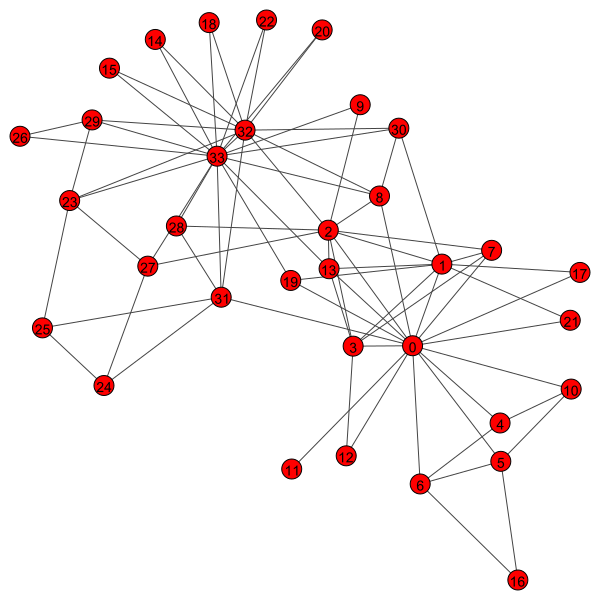

In [ ]:
ig.plot(g)

# Detection algorithms

Let's start using community detection algorithms to discover the split in the Karate club.

Here https://igraph.org/python/api/develop/igraph.community.html you can find the doc for Community detection algorithms.

For example let's use louvain algorithm (https://igraph.org/python/api/develop/igraph.community.html#_community_fastgreedy)

In [ ]:
louvain = g.community_fastgreedy()

In [ ]:
print(louvain)

Remember Louvain algorithm is iterative. That is why we get a dendogram as a result. We can run .as_clustering() to get the different clusterings

In [ ]:
print(louvain.as_clustering(2))

In [ ]:
for i in range(1, 10):
    print(louvain.as_clustering(i))
    print(g.modularity(louvain.as_clustering(i)))

We can plot the graph with different colors per group.

In [ ]:
pal = ig.drawing.colors.ClusterColoringPalette(len(louvain.as_clustering(3)))
g.vs['color'] = pal.get_many(louvain.as_clustering(3).membership)
ig.plot(g)

## Exercise: Try using different algorithms and meassure their modularity
(Tip: Not all algorithms (for example community_infomap) return a dendogram, they return a partition. You should check that)